# Project: Investigate TMBD-Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
TMBD dataset is contains information about 10,000 movies including Cast in each film, Film popularity, The year that the film released in, Budget and revenue of the film , user ratings and vote count according to imdb website , It contains 21 columns and 10866 rows.
I will explore data and clean it as possible , make analysis for the data based on questions.
I will try to make visualization analysis as possible 
### Questions to Answer:
<ul>
<li><a href="#q1">Which year has the largest budget ?</a></li>
<li><a href="#q2">Which genre are the most popular ?</a></li> 
<li><a href="#q3">Top 10 popular Cast and Directors</a></li>
<li><a href="#q7">Top 10 Most Rated Movies</a></li> 
<li><a href="#q4">Film with the most popularity</a></li>  
<li><a href="#q5">Does the duration of the movie affect the rate ?</a></li>
<li><a href="#q6">Correlation</a></li>  

</ul>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In this section we will load data and perform some cleaning for the data finding duplicates and missing value editing the data type of the columns
### General Properties
Load data and explore it and make some notes for analysis later

In [2]:
# Load data
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#rows and columns 
df.shape

(10866, 21)

In [4]:
#information about data
# check data type of each coulmn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#some statistical information about data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning
i'm going to clean my data, to ensure that the data if ready for my analysis.

In [6]:
#Drop the unnecessary columns for my analysis
df.drop(labels=['budget_adj','revenue_adj','id','imdb_id','tagline','keywords','homepage','overview'],axis=1,inplace=True)
df.shape

(10866, 13)

In [7]:
#check Duplicates
df.duplicated().sum()

1

In [8]:
#remove duplicate but leave one 
df.drop_duplicates(keep='first',inplace=True)
df.shape

(10865, 13)

In [9]:
#check null values
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

There is a problem some columns with non null values will be effective in some question to answer will the null values will not affect in this analysis (like average runtime of movies will be important and if we will drop all null values i will lose 1030 **the largest null value found** records of films.

In [10]:
#Drop null values 
df2=df.copy()
df.dropna(inplace=True)
df.shape,df2.shape

((9772, 13), (10865, 13))

In [11]:
#Change datatype of Release data to date datatype 
df['release_date'] = pd.to_datetime(df.release_date)
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [12]:
#confirmation of data is clean from 
df.isnull().sum().any()

False

- Note: 
 There is null values in form of 0 value in the integer and float datatype **but i can't remove them as they count like 5000 row so my data will be too small**

In [13]:
#Number of 0 values 
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  popularity  is :  0
Count of zeros in column  budget  is :  4751
Count of zeros in column  revenue  is :  5022
Count of zeros in column  original_title  is :  0
Count of zeros in column  cast  is :  0
Count of zeros in column  director  is :  0
Count of zeros in column  runtime  is :  13
Count of zeros in column  genres  is :  0
Count of zeros in column  production_companies  is :  0
Count of zeros in column  release_date  is :  0
Count of zeros in column  vote_count  is :  0
Count of zeros in column  vote_average  is :  0
Count of zeros in column  release_year  is :  0


In [14]:
#Making new Column called profit to calculate the profit of every film 
df['profit']=df['revenue'] - df['budget']

In [15]:
# View the index number and label for each column
for x, y in enumerate(df.columns):
    print(x, y)

0 popularity
1 budget
2 revenue
3 original_title
4 cast
5 director
6 runtime
7 genres
8 production_companies
9 release_date
10 vote_count
11 vote_average
12 release_year
13 profit


In [16]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354


<a id='eda'></a>
## Exploratory Data Analysis
<a id='q1'></a>
### Which year has the largest budget , revenue , profit ?

In [17]:
#group the data according to year and specify what we want (budget, revenue, profit)
year=df.groupby(df.release_year)[["budget","revenue","profit"]].sum()
year.head()

,budget,revenue,profit
release_year,,,
1960,22056948,145005000,122948052
1961,46137000,337720188,291583188
1962,54722126,215579846,160857720
1963,73331500,187404989,114073489
1964,39483161,340981782,301498621


In [18]:
#get the max year of every feature(budget, revenue, profit)
for i in range(3):
    c=year[year.columns[i]].max()
    y=year[year.columns[i]].idxmax()
    n=year.columns[i]
    print("Year {} has the most {} equals {} Dollars".format(y,n,c))

Year 2010 has the most budget equals 9331845996 Dollars
Year 2015 has the most revenue equals 26759924070 Dollars
Year 2015 has the most profit equals 19167976513 Dollars


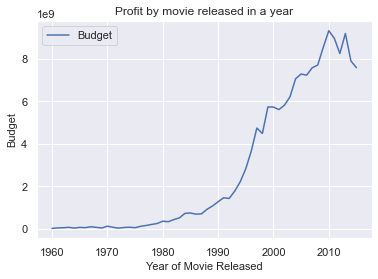

In [19]:
#visualization of year with Budget
sns.set()
# x-axis
plt.xlabel('Year of Movie Released', fontsize = 11)
# y-axis
plt.ylabel('Budget', fontsize = 11)
# Title
plt.title('Profit by movie released in a year')
# Legend 

# Plot Line chart
plt.plot(year.budget)
plt.legend(['Budget'])

# Display plot
plt.show()

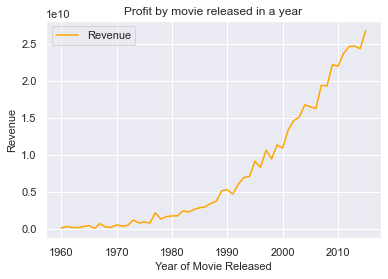

In [20]:
#visualization of year with Revenue

# x-axis
plt.xlabel('Year of Movie Released', fontsize = 11)
# y-axis
plt.ylabel('Revenue', fontsize = 11)
# Title
plt.title('Profit by movie released in a year')
# Legend 

# Plot Line chart
plt.plot(year.revenue,color='orange')
plt.legend(['Revenue'])

# Display plot
plt.show()

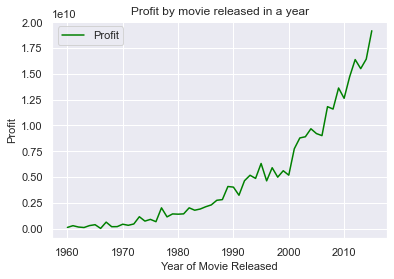

In [21]:
#visualization of year with profit

# x-axis
plt.xlabel('Year of Movie Released', fontsize = 11)
# y-axis
plt.ylabel('Profit', fontsize = 11)
# Title
plt.title('Profit by movie released in a year')
# Legend 

# Plot Line chart
plt.plot(year.profit,color='green')
plt.legend(['Profit'])

# Display plot
plt.show()

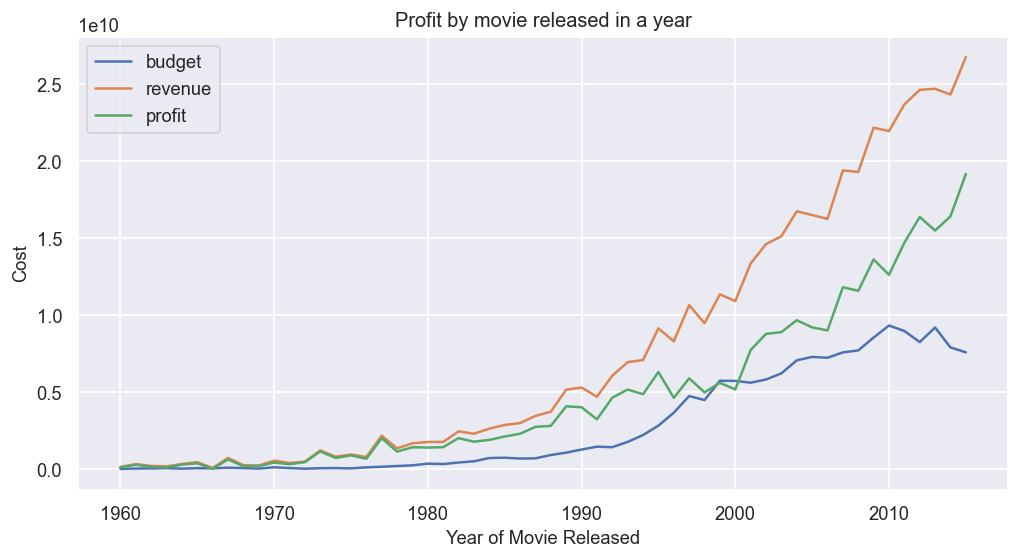

In [22]:
#visualization of year

# Figure size(width, height)
plt.figure(figsize=(10,5), dpi = 120)
# x-axis
plt.xlabel('Year of Movie Released', fontsize = 11)
# y-axis
plt.ylabel('Cost', fontsize = 11)
# Title
plt.title('Profit by movie released in a year')
# Legend 

# Plot Line chart
plt.plot(year)
plt.legend(['budget','revenue','profit'])

# Display plot
plt.show()

<a id='q2'></a>
### Which genre are the most popular ?
First we will seperate columns by | The Genres, Director, Cast, and production_companies column

i will create i function to enable me reuse the code anytime i like.

In [23]:
#function to Seperate by |
def separate(col_name):
    #this take a column, and separates with '|'
    separate = df[col_name].str.cat(sep = '|')
    
    #seperate values in Series
    separate = pd.Series(separate.split('|'))
    
    #count values and order them in descending so the most one be the first
    freq = separate.value_counts(ascending = False)
    
    return freq

In [24]:
#by using the function i have intialized before seperate genre column with |
genre=separate('genres')

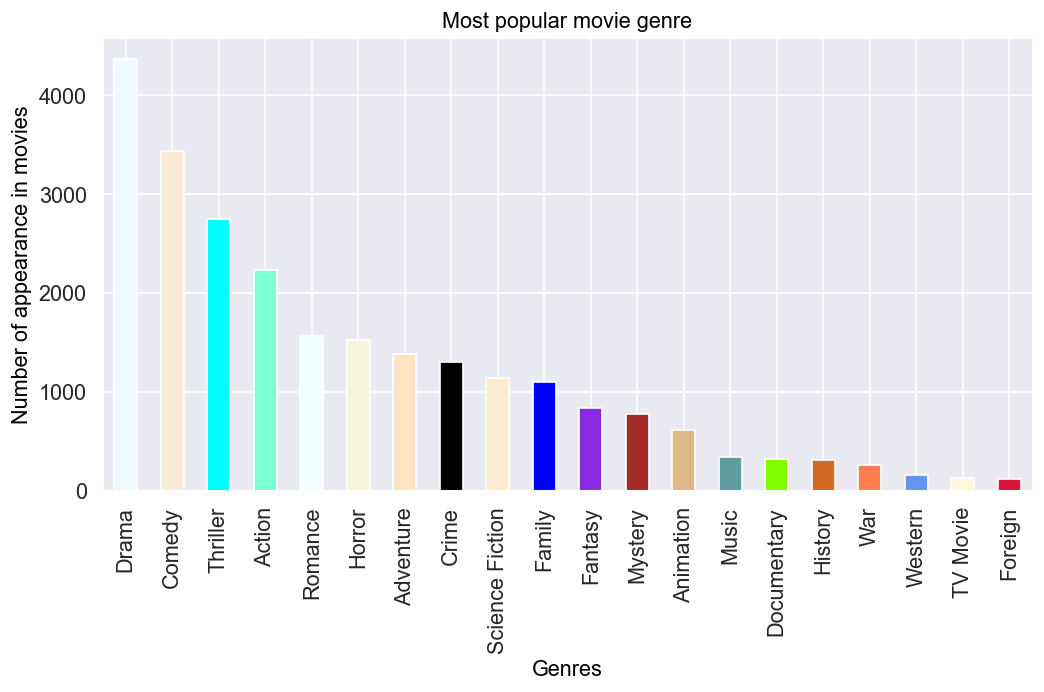

In [25]:
#set figure size and use bar visualization
plt.figure(figsize=(10,5), dpi = 120)
genre.plot.bar(fontsize = 13,color=mcolors.CSS4_COLORS)
#Add labels
plt.title('Most popular movie genre', color = 'black', fontsize = '13')
plt.xlabel('Genres', color = 'black', fontsize = '13')
plt.ylabel('Number of appearance in movies', color = 'black', fontsize = '13');

<a id='q3'></a>
## Top 10 popular Cast and Director
The most 10 popular Cast that appear in movies 

In [26]:
cast=separate('cast')[:10]
print(cast)

Robert De Niro       72
Samuel L. Jackson    70
Bruce Willis         62
Nicolas Cage         61
Michael Caine        52
Robin Williams       51
Morgan Freeman       49
John Goodman         48
John Cusack          48
Liam Neeson          47
dtype: int64


In [27]:
dire=separate('director')[:10]
print(dire)

Woody Allen          43
Clint Eastwood       34
Steven Spielberg     30
Martin Scorsese      28
Steven Soderbergh    23
Ridley Scott         23
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Wes Craven           19
dtype: int64


Text(0.5, 0, 'Director')

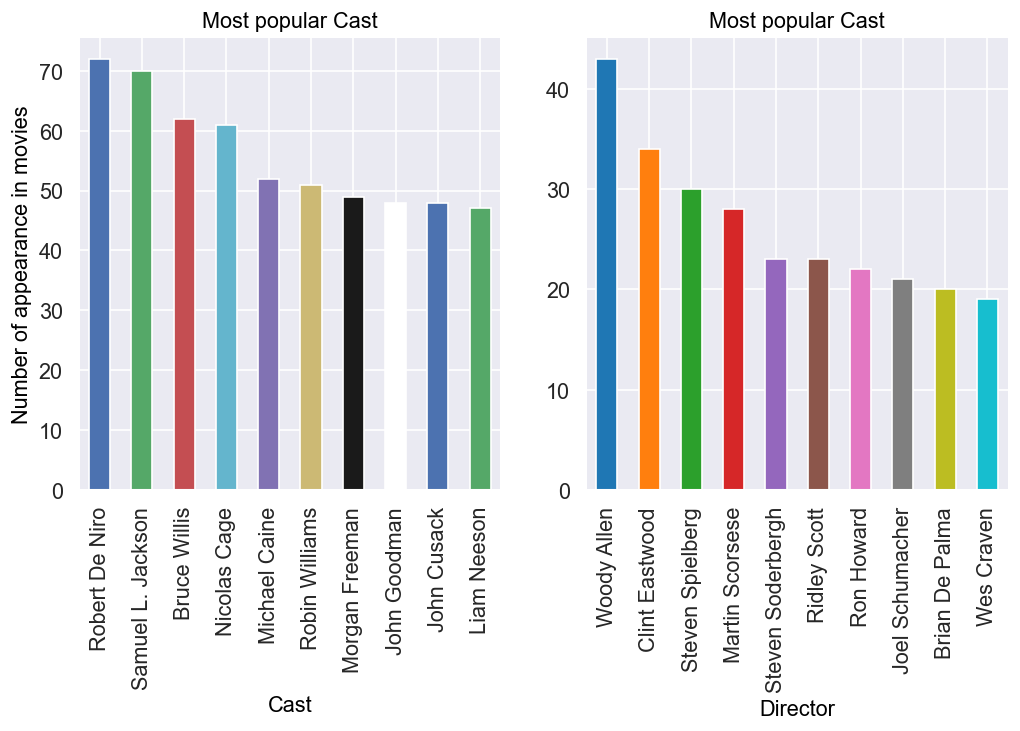

In [28]:
#set figure size and use bar visualization for Cast
plt.figure(figsize=(10,5), dpi = 120)
plt.subplot(1, 2, 1)
cast.plot.bar(fontsize = 13,color=mcolors.BASE_COLORS)
#Add labels
plt.title('Most popular Cast', color = 'black', fontsize = '13')
plt.xlabel('Cast', color = 'black', fontsize = '13')
plt.ylabel('Number of appearance in movies', color = 'black', fontsize = '13');

#set figure size and use bar visualization for Cast

plt.subplot(1,2,2)
dire.plot.bar(fontsize = 13,color=mcolors.TABLEAU_COLORS)
#Add labels
plt.title('Most popular Cast', color = 'black', fontsize = '13')
plt.xlabel('Director', color = 'black', fontsize = '13')


<a id='q7'></a>

## The Top 10 rated Movies

In [29]:
# Grab the list of top10 movies
voters = df.nlargest(10,'vote_average')
vt10 = voters.loc[:,['original_title', 'vote_average']].head(10)
vt10

,original_title,vote_average
6911,Pink Floyd: Pulse,8.7
3690,The Art of Flight,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5
8411,Queen - Rock Montreal,8.5
609,The Jinx: The Life and Deaths of Robert Durst,8.4
4178,The Shawshank Redemption,8.4
5986,"Guten Tag, RamÃ³n",8.4
7948,Stop Making Sense,8.4
1322,One Direction: Where We Are - The Concert,8.3
1864,Iron Maiden: Flight 666,8.3


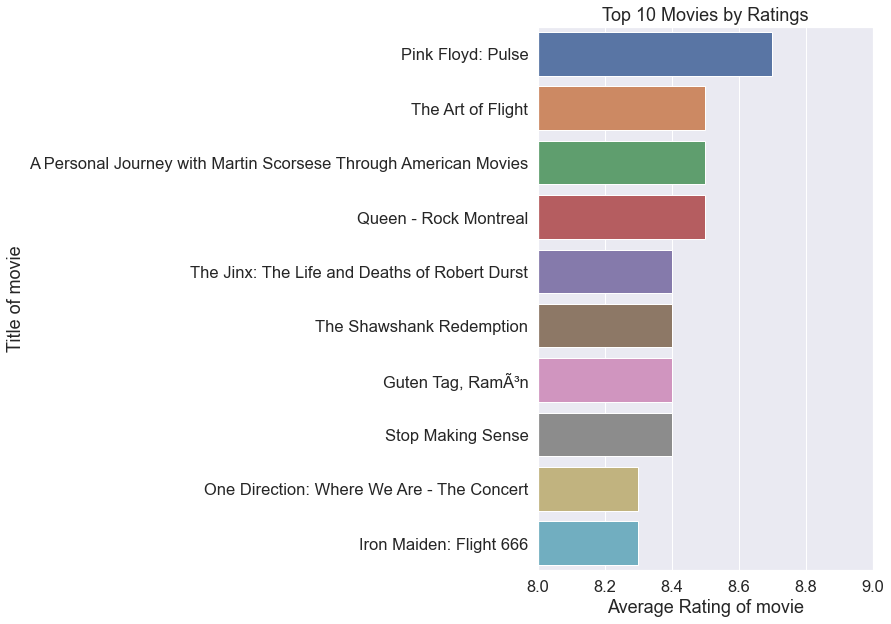

In [30]:
sns.set(font_scale=1.5);
f, ax = plt.subplots(figsize=(6, 10));
ax = sns.barplot(x='vote_average', y='original_title', data=vt10);

ax.set(xlim=(8,9), ylabel="Title of movie", xlabel="Average Rating of movie");
plt.title('Top 10 Movies by Ratings');

The most rated Movie was Pink Floyd:Pulse

<a id='q4'></a>
## Film with the most popularity

In [31]:
# Group by year then sum the popularity.
pop_m = df.groupby('original_title')['popularity'].sum()
t10= pop_m.nlargest(10)
t10

original_title
Jurassic World                           32.985763
Mad Max: Fury Road                       28.419936
Interstellar                             24.949134
Guardians of the Galaxy                  14.311205
Insurgent                                13.112507
Captain America: The Winter Soldier      12.971027
Star Wars                                12.037933
John Wick                                11.422751
Star Wars: The Force Awakens             11.173104
The Hunger Games: Mockingjay - Part 1    10.739009
Name: popularity, dtype: float64

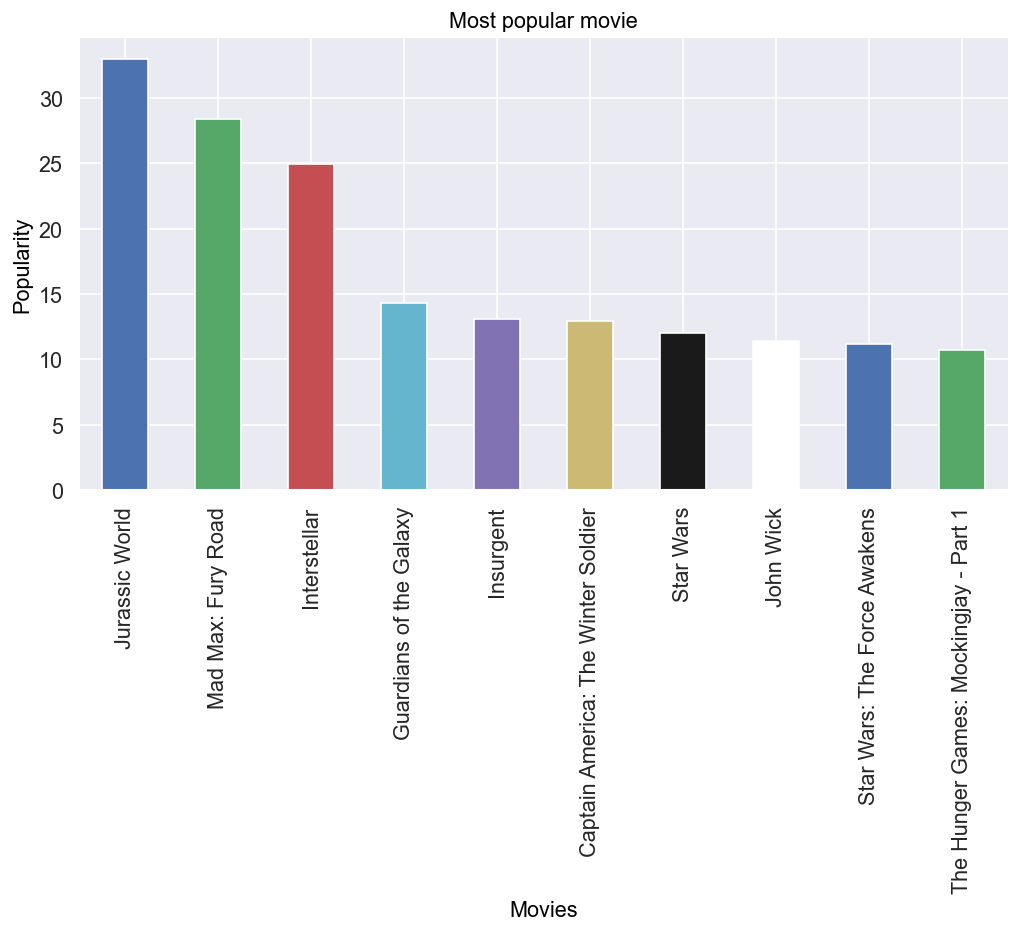

In [32]:
#set figure size and use bar visualization
plt.figure(figsize=(10,5), dpi = 120)
t10.plot.bar(fontsize = 13,color=mcolors.BASE_COLORS)
#Add labels
plt.title('Most popular movie', color = 'black', fontsize = '13')
plt.xlabel('Movies', color = 'black', fontsize = '13')
plt.ylabel('Popularity', color = 'black', fontsize = '13');

## Average Votes

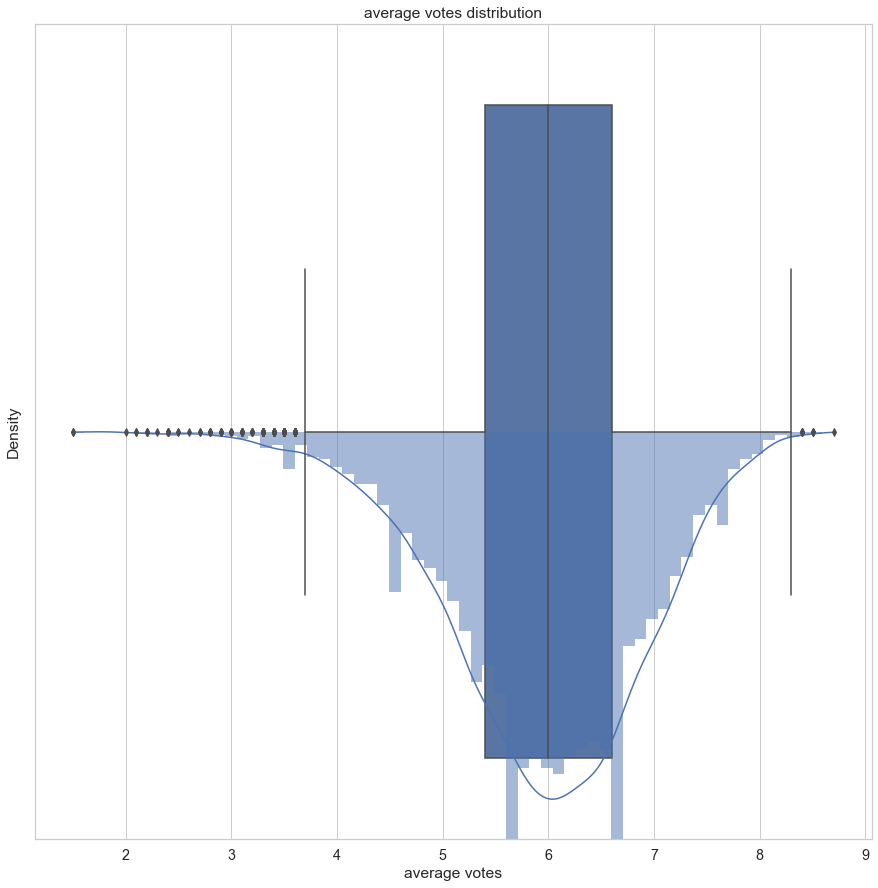

In [33]:
sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3)

temp_df = df[["vote_average"]]


sns.set_style("whitegrid")
ax = sns.histplot(temp_df.vote_average,kde=True, stat="density", linewidth=0)

ax = sns.boxplot(x = temp_df.vote_average)

ax.set(xlabel='average votes', title = 'average votes distribution')
plt.show()

<a id='q5'></a>

## Does the duration of the movie affect the rate ?

In [34]:
#group the data by vote_average and take runtime column
average=df.groupby('vote_average')['runtime'].mean()
average

vote_average
1.5     80.000000
2.0     75.000000
2.1     87.500000
2.2     87.333333
2.3     86.000000
          ...    
8.2     77.500000
8.3    185.000000
8.4    147.250000
8.5    147.666667
8.7    145.000000
Name: runtime, Length: 68, dtype: float64

In [35]:
#mean of runtime
df['runtime'].mean()

102.92662709783053

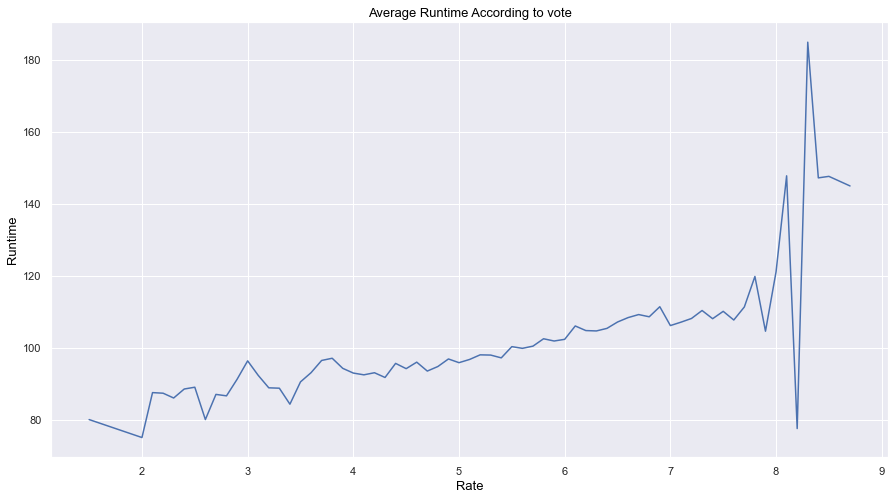

In [36]:
#visualize the average data we have just get by plot 
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style()
plt.plot(average)
#Add labels
plt.title('Average Runtime According to vote', color = 'black', fontsize = '13')
plt.xlabel('Rate', color = 'black', fontsize = '13')
plt.ylabel('Runtime', color = 'black', fontsize = '13');

As the graph above the runtime affect the vote_rating so we can see that most high rating is after the mean of the run time but there is some irregular voting after the mean too

<a id='q6'></a>

## Correlations
in this section i will correlate most the columns that will answer many question on data
<li><a href="#z1">Correlation between between Runtime vs Popularity</a></li>
<li><a href="#z2">Correlation between between Budget vs Revenue</a></li>
<li><a href="#z3">Correlation between between vote_average vs vote_count</a></li>
<li><a href="#z4">Correlation between between Popularity vs Profit</a></li>
<li><a href="#z5">Correlation between between Profit vs Vote Count</a></li>
<li><a href="#z6">Correlation between between Profit vs Revenue</a></li>

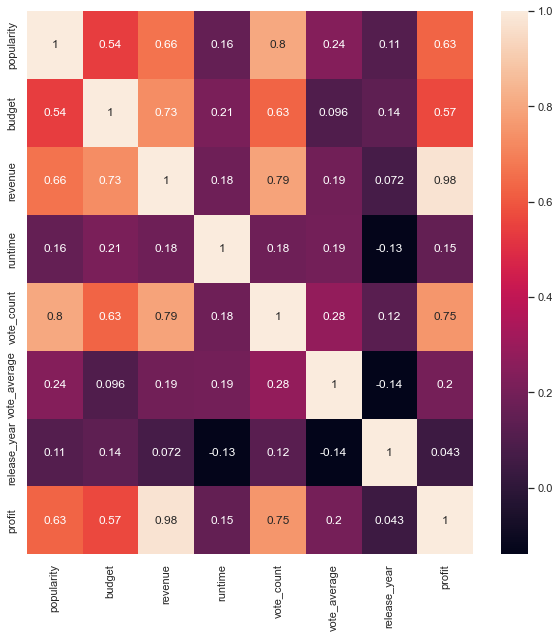

In [37]:
#making heatmap for all data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<a id='z1'></a>

### Correlation between between Runtime vs Popularity



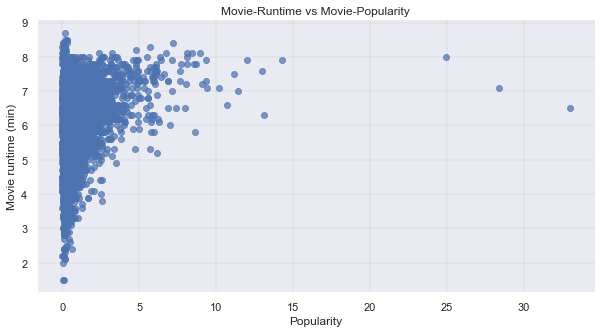

In [38]:
fig, sc = plt.subplots(figsize=(10, 5))
#customizes alpha for each dot in the scatter plot
sc.scatter(df['popularity'], df['vote_average'],alpha=.7)


#adds a title and axes labels
sc.set_title('Movie-Runtime vs Movie-Popularity')
sc.set_xlabel('Popularity')
sc.set_ylabel('Movie runtime (min)')

#removing top and right borders
sc.spines['top'].set_visible(False)
sc.spines['right'].set_visible(False)

#adds major gridlines
sc.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

In [39]:
df['profit'].corr(df['budget']) 

0.5660896218835975

The above scatter plot shows there is a weak positive correlation between Movie Duration and Movie Popularity.

<a id='z2'></a>

### Correlation between between Budget vs Revenue

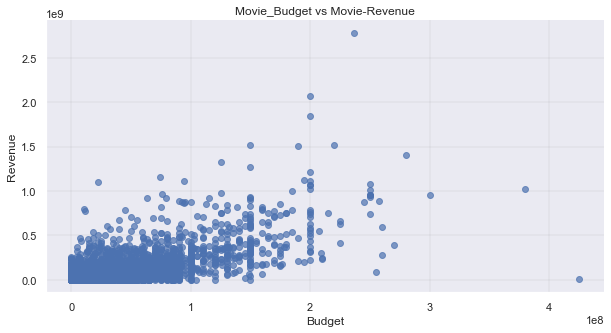

In [40]:
fig, sc = plt.subplots(figsize=(10, 5))
#customizes alpha for each dot in the scatter plot
sc.scatter(df['budget'], df['revenue'],alpha=.7)


#adds a title and axes labels
sc.set_title('Movie_Budget vs Movie-Revenue')
sc.set_xlabel('Budget')
sc.set_ylabel('Revenue')

#removing top and right borders
sc.spines['top'].set_visible(False)
sc.spines['right'].set_visible(False)

#adds major gridlines
sc.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

In [41]:
df['budget'].corr(df['revenue']) 

0.7312035414588187

The above scatter plot shows there is a relatively strong positive correlation between Movie Budget and Revenue.

<a id='z3'></a>

### Correlation between between vote_average vs vote_count

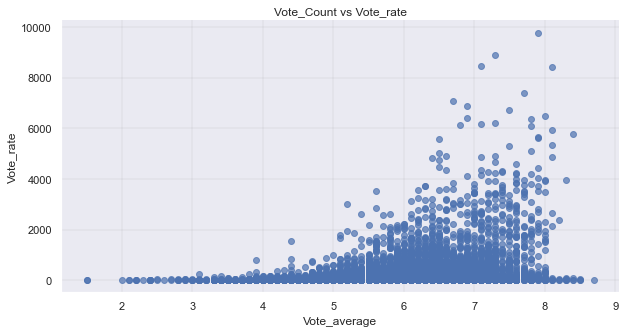

In [42]:
fig, sc = plt.subplots(figsize=(10, 5))
#customizes alpha for each dot in the scatter plot
sc.scatter(df['vote_average'], df['vote_count'],alpha=.7)


#adds a title and axes labels
sc.set_title('Vote_Count vs Vote_rate')
sc.set_xlabel('Vote_average')
sc.set_ylabel('Vote_rate')

#removing top and right borders
sc.spines['top'].set_visible(False)
sc.spines['right'].set_visible(False)

#adds major gridlines
sc.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

In [43]:
df['vote_average'].corr(df['vote_count']) 

0.27985127914246966

The above scatter plot shows there is a very weak positive correlation between Vote Average and Vote Count.

<a id='z4'></a>

### Correlation between between Popularity vs Profit

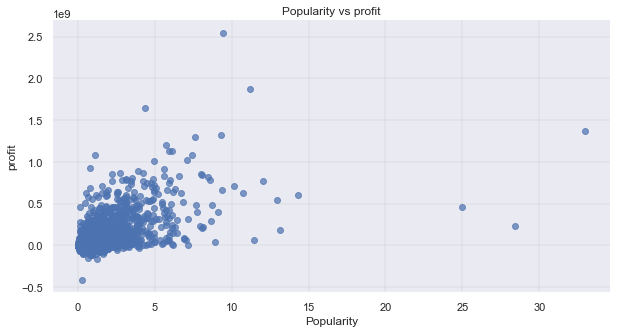

In [44]:
fig, sc = plt.subplots(figsize=(10, 5))
#customizes alpha for each dot in the scatter plot
sc.scatter(df['popularity'], df['profit'],alpha=.7)


#adds a title and axes labels
sc.set_title('Popularity vs profit')
sc.set_xlabel('Popularity')
sc.set_ylabel('profit')

#removing top and right borders
sc.spines['top'].set_visible(False)
sc.spines['right'].set_visible(False)

#adds major gridlines
sc.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

In [45]:
df['popularity'].corr(df['profit']) 

0.6293535791944577

The above scatter plot shows there is a weak positive correlation between Movie Popularity and Movie Profit.

<a id='z5'></a>

### Correlation between between Profit vs Vote Count

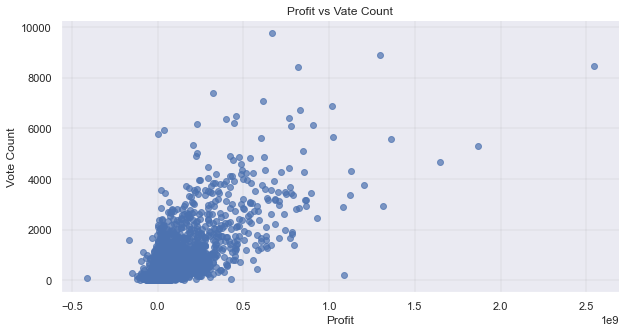

In [46]:
fig, sc = plt.subplots(figsize=(10, 5))
#customizes alpha for each dot in the scatter plot
sc.scatter(df['profit'], df['vote_count'],alpha=.7)


#adds a title and axes labels
sc.set_title('Profit vs Vate Count')
sc.set_xlabel('Profit')
sc.set_ylabel('Vote Count')

#removing top and right borders
sc.spines['top'].set_visible(False)
sc.spines['right'].set_visible(False)

#adds major gridlines
sc.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

In [47]:
df['profit'].corr(df['vote_count']) 

0.7537819319051191

The above scatter plot shows there is a strong positive correlation between Vote Count and Movie Profit.

<a id='z6'></a>

### Correlation between between Profit vs Revenue

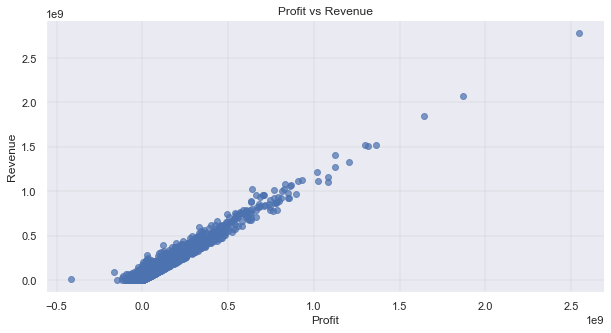

In [48]:
fig, sc = plt.subplots(figsize=(10, 5))
#customizes alpha for each dot in the scatter plot
sc.scatter(df['profit'], df['revenue'],alpha=.7)


#adds a title and axes labels
sc.set_title('Profit vs Revenue')
sc.set_xlabel('Profit')
sc.set_ylabel('Revenue')

#removing top and right borders
sc.spines['top'].set_visible(False)
sc.spines['right'].set_visible(False)

#adds major gridlines
sc.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

In [49]:
df['profit'].corr(df['revenue']) 

0.9762605019465771

The above scatter plot shows there is a very strong positive correlation between Movie Profit and Movie Revenue.

#### At the begging of our investigation we make a copy of data before we drop the null data i will make a heatmap for this coppied data to see if we if it was important to do that

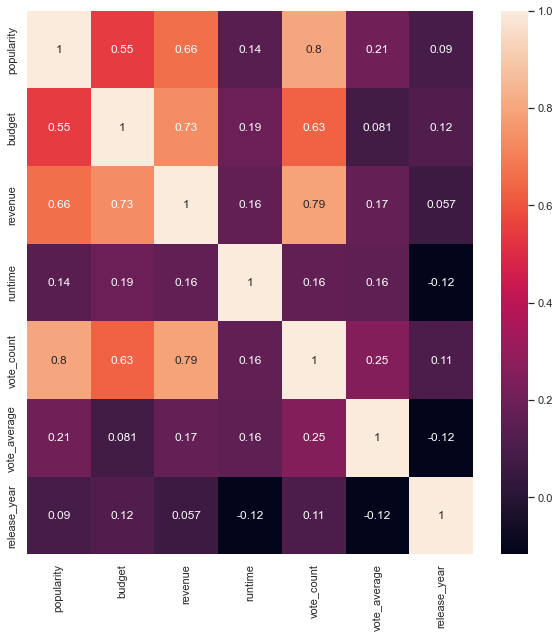

In [50]:
#making heatmap for all copied data
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True)
plt.show()

<a id='conclusions'></a>
# Conclusions

#### It's been interesting analyzing the The Movie Database (TMDb) i learned so many thins when doing process.
#### i found that:
- Year 2010 has the most budget.
- Year 2015 has the most revenue and the most profit. 
- From the year 1960 to 2015:
- The most produced movie genre was Drama then Comedy comes next
- The most Popular Cast that appear in Movies Robert De Niro
- The most Popular Director Woody Allen
- The most Popular Movie is Jurrassic World
- The most rated Movie was Pink Floyd:Pulse

### Limitations:
> The Data have many 0 values in many numerical Columns that should count for Nan Value but it was like 5022 records it should be deleted but I didn't as it delete have of another important data


>The number of vote_count was too small related to the film's popularity and vote_average that should be the rate of the film it depends on vote_count that is not constant the vote_count is different at each film so vote_average can't be depended on

# Resources:
- https://matplotlib.org/3.5.0/gallery/color/named_colors.html
- https://matplotlib.org/3.5.0/
- https://seaborn.pydata.org/